# Decision Tree / Random Forest
### Data Mining Classification Project
by Rick Gosalvez, SV@Home, SJSU MSDA (rick@siliconvalleyathome.org) 

#### Are CA AFH State Tools Speeding Up Approvals? What is the Optimal Mix?

<li>Data from affordable and market rate developers and opensource.
<li>Use 3 methods to classify data.
<li>21 features

#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier     # not example discussed in class

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc                       # Area under curve for final step in random tree chart

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# set default plot size for all charts
plt.rcParams['figure.figsize'] = [10, 8]

#### Load data and preview

In [4]:
df = pd.read_csv('DATA_ML_Project_MFR_FINAL.csv', parse_dates=['Submitted','Approved'])
df.head()

,Dev,Name,Address,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,DU,MKT,AFH,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,Submitted,Approved
0,RCD,Madrone Terrace,60060 E 14th Street,Ashland,Y,Y,Y,N,79,1,79,Y,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-12,2019-11-13
1,NaN,Fourth Street,1900 Fourth Street,Berkeley,Y,Y,Y,Y,260,130,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-08,2021-04-22
2,RCD,Maudelle Miller Shirek,2001 Ashby,Berkeley,Y,Y,Y,Y,87,1,86,Y,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019-12-20
3,NaN,Blake,2015 Blake,Berkeley,Y,Y,Y,Y,155,155,0,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-07-10,2021-03-18
4,NaN,Telegraph,3031 Telegraph,Berkeley,Y,N,N,N,110,110,0,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-08-05,2020-11-20


#### Clean and prepare data

In [5]:
# drop names

df.drop(columns=['Dev', 'Name','Address'], inplace=True)
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,DU,MKT,AFH,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,Submitted,Approved
0,Ashland,Y,Y,Y,N,79,1,79,Y,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-12,2019-11-13
1,Berkeley,Y,Y,Y,Y,260,130,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-08,2021-04-22
2,Berkeley,Y,Y,Y,Y,87,1,86,Y,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019-12-20
3,Berkeley,Y,Y,Y,Y,155,155,0,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-07-10,2021-03-18
4,Berkeley,Y,N,N,N,110,110,0,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-08-05,2020-11-20


In [6]:
# Part_AFH (> 15% inclusionary AFH), All_AFH (Y/N)
df['All_AFH']  = df.AFH >= df.DU - 2
df['Part_AFH'] = df.AFH/df.DU >= 0.15
df

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,DU,MKT,AFH,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,Submitted,Approved,All_AFH,Part_AFH
0,Ashland,Y,Y,Y,N,79,1,79,Y,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-12,2019-11-13,True,True
1,Berkeley,Y,Y,Y,Y,260,130,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-08,2021-04-22,False,True
2,Berkeley,Y,Y,Y,Y,87,1,86,Y,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019-12-20,True,True
3,Berkeley,Y,Y,Y,Y,155,155,0,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-07-10,2021-03-18,False,False
4,Berkeley,Y,N,N,N,110,110,0,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-08-05,2020-11-20,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Sunnyvale,Y,N,N,N,141,123,18,NaN,Y,NaN,NaN,NaN,NaN,NaN,2020-08-28,2021-02-26,False,False
108,Sunnyvale,Y,Y,Y,Y,28,24,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-17,NaT,False,False
109,Sunnyvale,Y,Y,Y,Y,35,30,5,NaN,Y,NaN,NaN,NaN,NaN,NaN,2021-03-05,NaT,False,False
110,Vallejo,Y,Y,N,N,75,1,74,Y,NaN,NaN,Y,NaN,NaN,NaN,2020-07-16,2020-10-29,True,True


In [7]:
# calculate days and cut-off, if < 180 days '1', else '0'
df['Days']         = df.Approved - df.Submitted
df['Streamlined']  = df['Days'].dt.days <= 180
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,DU,MKT,AFH,SB35,SB330,...,AB2162,AB2345,AB2372,AB3194,Submitted,Approved,All_AFH,Part_AFH,Days,Streamlined
0,Ashland,Y,Y,Y,N,79,1,79,Y,NaN,...,NaN,NaN,NaN,NaN,2019-08-12,2019-11-13,True,True,93 days,True
1,Berkeley,Y,Y,Y,Y,260,130,130,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-08,2021-04-22,False,True,1141 days,False
2,Berkeley,Y,Y,Y,Y,87,1,86,Y,NaN,...,NaN,NaN,NaN,NaN,2019-10-04,2019-12-20,True,True,77 days,True
3,Berkeley,Y,Y,Y,Y,155,155,0,NaN,Y,...,NaN,NaN,NaN,NaN,2020-07-10,2021-03-18,False,False,251 days,False
4,Berkeley,Y,N,N,N,110,110,0,NaN,Y,...,NaN,NaN,NaN,NaN,2020-08-05,2020-11-20,False,False,107 days,True


In [8]:
# drop unused columns
df.drop(columns=['DU', 'MKT','AFH','Submitted', 'Approved','Days'], inplace=True)
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,All_AFH,Part_AFH,Streamlined
0,Ashland,Y,Y,Y,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
1,Berkeley,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
2,Berkeley,Y,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
3,Berkeley,Y,Y,Y,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,False,False,False
4,Berkeley,Y,N,N,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,False,False,True


In [9]:
# filling in NaN with 0
df["SB35"].fillna(0, inplace = True)
df["SB330"].fillna(0, inplace = True)
df["AB1763"].fillna(0, inplace = True)
df["AB2162"].fillna(0, inplace = True)
df["AB2345"].fillna(0, inplace = True)
df["AB2372"].fillna(0, inplace = True)
df["AB3194"].fillna(0, inplace = True)
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,All_AFH,Part_AFH,Streamlined
0,Ashland,Y,Y,Y,N,Y,0,0,0,0,0.0,0,True,True,True
1,Berkeley,Y,Y,Y,Y,0,0,0,0,0,0.0,0,False,True,False
2,Berkeley,Y,Y,Y,Y,Y,0,0,0,0,0.0,0,True,True,True
3,Berkeley,Y,Y,Y,Y,0,Y,0,0,0,0.0,0,False,False,False
4,Berkeley,Y,N,N,N,0,Y,0,0,0,0.0,0,False,False,True


In [10]:
# converting 'AB2372' from float to int
df['AB2372'] = df['AB2372'].astype(int)
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,All_AFH,Part_AFH,Streamlined
0,Ashland,Y,Y,Y,N,Y,0,0,0,0,0,0,True,True,True
1,Berkeley,Y,Y,Y,Y,0,0,0,0,0,0,0,False,True,False
2,Berkeley,Y,Y,Y,Y,Y,0,0,0,0,0,0,True,True,True
3,Berkeley,Y,Y,Y,Y,0,Y,0,0,0,0,0,False,False,False
4,Berkeley,Y,N,N,N,0,Y,0,0,0,0,0,False,False,True


In [11]:
# converting 'Streamlined' boolean to int
df['All_AFH'] = df.apply(lambda row: row['All_AFH'] == True, axis=1).astype(int)
df['Part_AFH'] = df.apply(lambda row: row['Part_AFH'] == True, axis=1).astype(int)
df['Streamlined'] = df.apply(lambda row: row['Streamlined'] == True, axis=1).astype(int)
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,All_AFH,Part_AFH,Streamlined
0,Ashland,Y,Y,Y,N,Y,0,0,0,0,0,0,1,1,1
1,Berkeley,Y,Y,Y,Y,0,0,0,0,0,0,0,0,1,0
2,Berkeley,Y,Y,Y,Y,Y,0,0,0,0,0,0,1,1,1
3,Berkeley,Y,Y,Y,Y,0,Y,0,0,0,0,0,0,0,0
4,Berkeley,Y,N,N,N,0,Y,0,0,0,0,0,0,0,1


In [12]:
# convert Y and N to 1 and 0 (binary)
df = df.replace(['Y'],1)
df = df.replace(['N'],0)
df.head()

,City,GP_COMPLY,Z_COMPLY,TOD,PLAN_AREA,SB35,SB330,AB1763,AB2162,AB2345,AB2372,AB3194,All_AFH,Part_AFH,Streamlined
0,Ashland,1,1,1,0,1,0,0,0,0,0,0,1,1,1
1,Berkeley,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2,Berkeley,1,1,1,1,1,0,0,0,0,0,0,1,1,1
3,Berkeley,1,1,1,1,0,1,0,0,0,0,0,0,0,0
4,Berkeley,1,0,0,0,0,1,0,0,0,0,0,0,0,1


### 2. Split input and output

In [13]:
# 13 input features (data attributes)
X=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,0]]
X.keys()

Index(['GP_COMPLY', 'Z_COMPLY', 'TOD', 'PLAN_AREA', 'SB35', 'SB330', 'AB1763',
       'AB2162', 'AB2345', 'AB2372', 'AB3194', 'All_AFH', 'Part_AFH', 'City'],
      dtype='object')

In [14]:
# outcome/output
y=df['Streamlined']

### 3. Make dummy features

In [15]:
X = pd.get_dummies(X, columns=['GP_COMPLY', 'Z_COMPLY', 'TOD', 'PLAN_AREA', 'SB35', 'SB330', 'AB1763',
       'AB2162', 'AB2345', 'AB2372', 'AB3194', 'All_AFH', 'Part_AFH', 'City',], drop_first=True)
X.head()

,GP_COMPLY_1,Z_COMPLY_1,TOD_1,PLAN_AREA_1,SB35_1,SB330_1,AB1763_1,AB2162_1,AB2345_1,AB3194_1,...,City_San Leandro,City_San jose,City_Santa Clara,City_Santa Clara,City_Santa Rosa,City_Saratoga,City_South Lake Tahoe,City_Sunnyvale,City_Vallejo,City_Walnut Creek
0,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Larger (nonparametric) datasets work better for decision trees.

#### Due to the size of the dataset, it is recommended to grow full trees using both <b>gini</b> and <b>entropy</b> methods and prune for improved accuracy.

### 4. Split into test and training

In [16]:
# split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### 5. Decision Tree Classsifier: gini

In [17]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)   # max_depth - lower is more accurate; None is less accurate
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [18]:
y_pred = tree.predict(X_test)

### 6. Confustion Matrix Visual: gini Index

In [19]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],16,2
True[1],2,3


In [20]:
y_pred_p = tree.predict_proba(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.60      0.60      0.60         5

    accuracy                           0.83        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.83      0.83      0.83        23



### 7. ROC curve and Cumulative Gain Charts

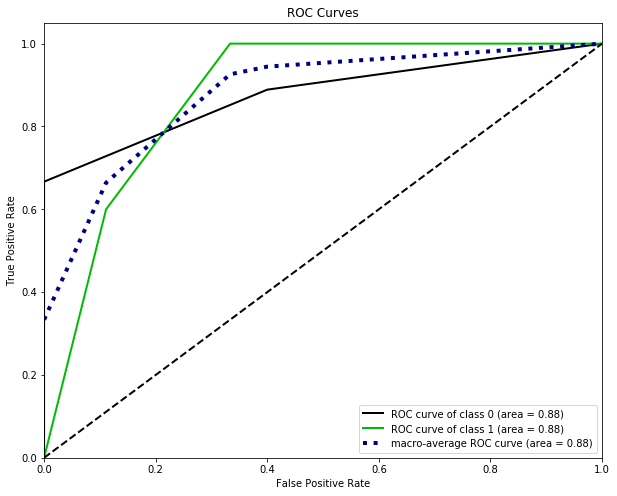

In [22]:
skplt.metrics.plot_roc(y_test, tree.predict_proba(X_test), plot_micro=False)
plt.show()

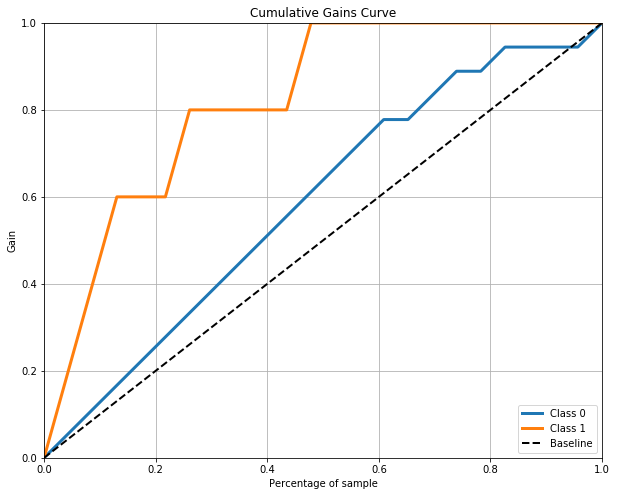

In [23]:
skplt.metrics.plot_cumulative_gain(y_test, tree.predict_proba(X_test))
plt.show()

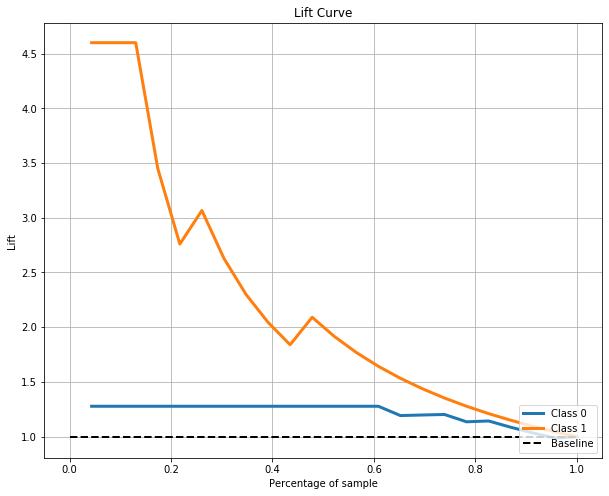

In [24]:
skplt.metrics.plot_lift_curve(y_test, tree.predict_proba(X_test))
plt.show()

### 8. Tuning Decision Tree Classsifier

In [25]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10) # max_depth and random_state do not affect accuracy, min_samples cannot exceed 14
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

In [26]:
y_pred = tree.predict(X_test)

In [27]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],16,2
True[1],2,3


In [28]:
y_pred_p = tree.predict_proba(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.60      0.60      0.60         5

    accuracy                           0.83        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.83      0.83      0.83        23



max_depth and random_state <u>do not affect accuracy</u> for decision tree classifier on this dataset, but do affect AUC. optimal depth is 2 for decision tree. min_sample_leaf does affect accuracy and cannot exceed 14.

Considered leveraging domain to add 'weight' to streamlining state tools with class_weight, but opted not to as to let the model validate without bias.

### 9. Random Forest - Entropy

max_depth and n_estimators affect accuracy and AUC. Optimal depth is 4 for highest accuracy and 500+ n_esstimators for max AUC.

                  feature  importance       std
33  City_South Lake Tahoe    0.000000  0.000000
35           City_Vallejo    0.000000  0.000000
16          City_Hayward     0.000000  0.000000
18         City_Los Altos    0.000528  0.004856
27       City_San Leandro    0.000760  0.006267
15          City_Fremont     0.000869  0.007920
20          City_Milpitas    0.000871  0.005528
28          City_San jose    0.001817  0.011933
22     City_Mountain View    0.002372  0.018603
26         City_San Jose     0.002404  0.018116
30      City_Santa Clara     0.007744  0.031156
29       City_Santa Clara    0.008150  0.026542
23         City_Palo Alto    0.009118  0.035640
13         City_Cupertino    0.009946  0.038498
0             GP_COMPLY_1    0.014621  0.040607
17         City_Lafayette    0.016015  0.052197
19        City_Marin City    0.018069  0.062042
14        City_Emeryville    0.020799  0.062124
24     City_San Francisco    0.021388  0.065786
36      City_Walnut Creek    0.021435  0

Text(0, 0.5, '')

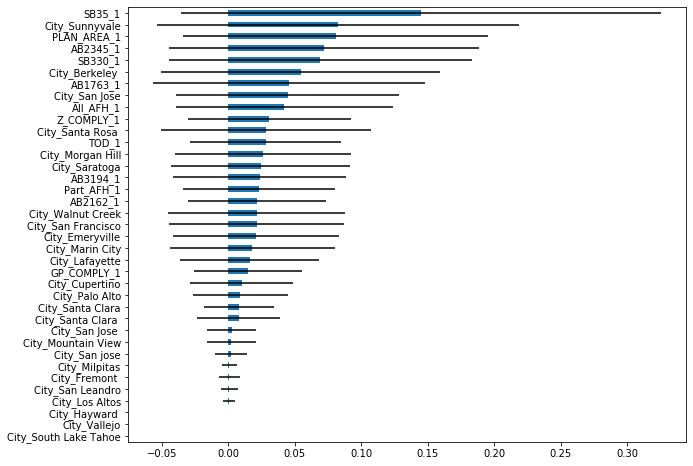

In [30]:
tree   = DecisionTreeClassifier(criterion='entropy', max_depth = 2, min_samples_leaf=10, random_state=1)
forest = RandomForestClassifier(criterion='entropy', max_depth = 4, n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances  = forest.feature_importances_
std          = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
df_rf        = pd.DataFrame({'feature':X_train.columns, 'importance': importances, 'std': std})
df_rf        = df_rf.sort_values('importance')

print(df_rf)

ax = df_rf.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

Sensitivity for Decision Tree: 0.600
Accuracy for Decision Tree: 0.826
Sensitivity for Random Forest: 0.000
Accuracy for Random Forest: 0.783


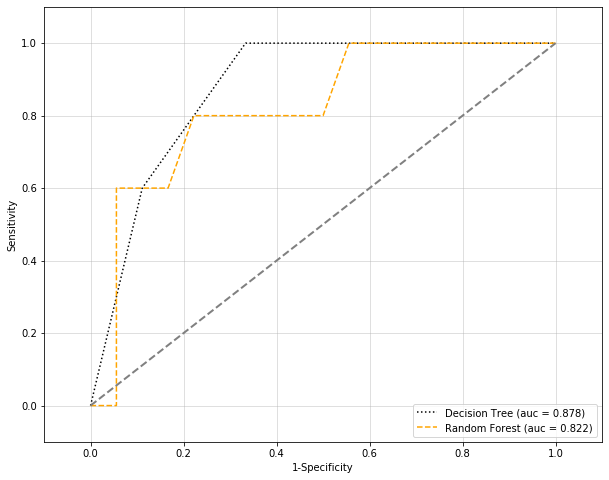

In [31]:
clf_labels  = ['Decision Tree', 'Random Forest']
all_clf      = [tree, forest]

colors       = ['black', 'orange', 'blue', 'green']
linestyles   = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred   = clf.predict_proba(X_test)[:,1]
    y_p      = clf.predict(X_test)
    print('Sensitivity for %s: %.3f' % (label, recall_score(y_true=y_test, y_pred=y_p)))
    print('Accuracy for %s: %.3f' % (label, accuracy_score(y_true=y_test, y_pred=y_p)))
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc  = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.3f)'% (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

In [32]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.00      0.00      0.00         5

    accuracy                           0.78        23
   macro avg       0.39      0.50      0.44        23
weighted avg       0.61      0.78      0.69        23



### Random Forest - gini

                  feature  importance       std
33  City_South Lake Tahoe    0.000000  0.000000
35           City_Vallejo    0.000000  0.000000
16          City_Hayward     0.000000  0.000000
18         City_Los Altos    0.000115  0.001089
28          City_San jose    0.000243  0.001768
20          City_Milpitas    0.000447  0.003487
27       City_San Leandro    0.000452  0.004092
15          City_Fremont     0.000623  0.007314
22     City_Mountain View    0.001065  0.013150
26         City_San Jose     0.003111  0.021798
29       City_Santa Clara    0.003734  0.016906
30      City_Santa Clara     0.006510  0.029670
23         City_Palo Alto    0.007848  0.033046
13         City_Cupertino    0.011962  0.046063
0             GP_COMPLY_1    0.013458  0.042719
7                AB2162_1    0.015140  0.043763
17         City_Lafayette    0.015878  0.052433
11             Part_AFH_1    0.018924  0.047220
19        City_Marin City    0.021916  0.071429
2                   TOD_1    0.023286  0

Text(0, 0.5, '')

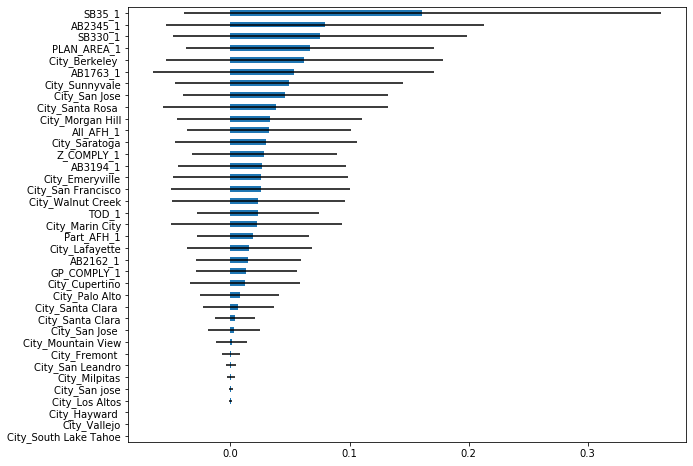

In [33]:
tree   = DecisionTreeClassifier(criterion='gini', max_depth = 2, random_state=1)
forest = RandomForestClassifier(criterion='gini', max_depth = 4, n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances  = forest.feature_importances_
std          = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
df_rf           = pd.DataFrame({'feature':X_train.columns, 'importance': importances, 'std': std})
df_rf           = df_rf.sort_values('importance')

print(df_rf)

ax = df_rf.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

Sensitivity for Decision Tree: 0.600
Accuracy for Decision Tree: 0.826
Sensitivity for Random Forest: 0.000
Accuracy for Random Forest: 0.783


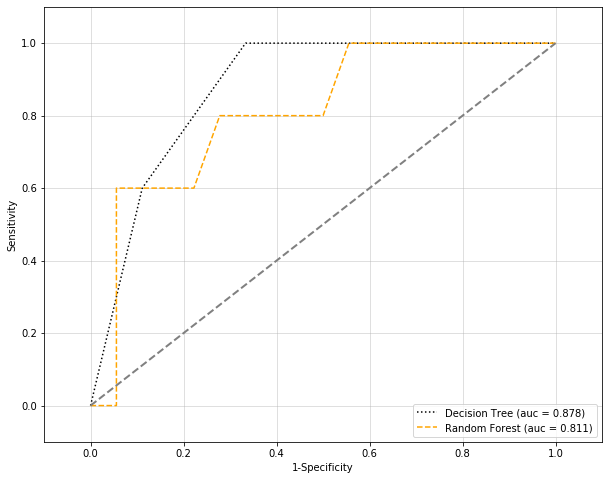

In [34]:
clf_labels  = ['Decision Tree', 'Random Forest']
all_clf      = [tree, forest]

colors       = ['black', 'orange', 'blue', 'green']
linestyles   = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred   = clf.predict_proba(X_test)[:,1]
    y_p      = clf.predict(X_test)
    print('Sensitivity for %s: %.3f' % (label, recall_score(y_true=y_test, y_pred=y_p)))
    print('Accuracy for %s: %.3f' % (label, accuracy_score(y_true=y_test, y_pred=y_p)))
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc  = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.3f)'% (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

# Analysis

Random Forest Accuracies vs Decision Tree (step 5):
* Model from 5 accuracy = 0.83 gini | AUC 0.88
* Model from 9 accuracy = 0.78 gini | AUC 0.82
* Model from 9 accuracy = 0.78 entropy | AUC 0.81

#### Decision Tree is the better model for this dataset.

# Alternate Feature Reduction Analysis

<div class="alert alert-block alert-warning">
    <b>Feature Reduction Assessment:</b> Would the model be more accurate if only assessing state law features (e.g., remove cities)? How does this compare to models that include cities as a feature?
</div>

### Remove cities from dataframe and prepare data

In [35]:
X=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
X.keys()

Index(['GP_COMPLY', 'Z_COMPLY', 'TOD', 'PLAN_AREA', 'SB35', 'SB330', 'AB1763',
       'AB2162', 'AB2345', 'AB2372', 'AB3194', 'All_AFH', 'Part_AFH'],
      dtype='object')

In [36]:
# outcome/output
y=df['Streamlined']

In [37]:
X = pd.get_dummies(X, columns=['GP_COMPLY', 'Z_COMPLY', 'TOD', 'PLAN_AREA', 'SB35', 'SB330', 'AB1763',
       'AB2162', 'AB2345', 'AB2372', 'AB3194', 'All_AFH', 'Part_AFH',], drop_first=True)
X.head()

,GP_COMPLY_1,Z_COMPLY_1,TOD_1,PLAN_AREA_1,SB35_1,SB330_1,AB1763_1,AB2162_1,AB2345_1,AB3194_1,All_AFH_1,Part_AFH_1
0,1,1,1,0,1,0,0,0,0,0,1,1
1,1,1,1,1,0,0,0,0,0,0,0,1
2,1,1,1,1,1,0,0,0,0,0,1,1
3,1,1,1,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0


In [38]:
# split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [39]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [40]:
y_pred = tree.predict(X_test)

In [41]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],16,2
True[1],2,3


In [42]:
y_pred_p = tree.predict_proba(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.60      0.60      0.60         5

    accuracy                           0.83        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.83      0.83      0.83        23



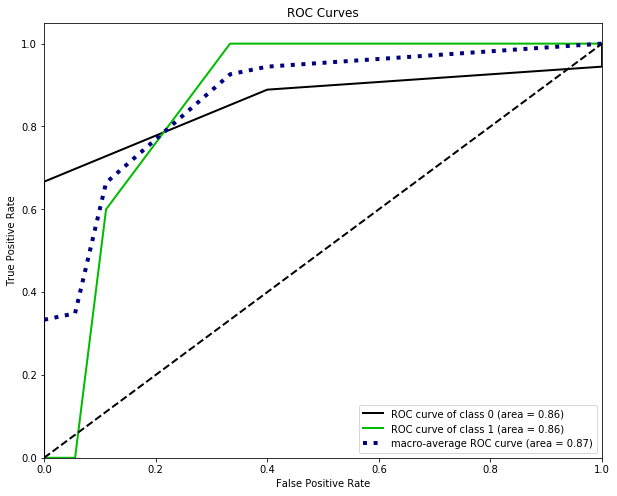

In [44]:
skplt.metrics.plot_roc(y_test, tree.predict_proba(X_test), plot_micro=False)
plt.show()

# Does not improve model to exclude cities.

Excluding cities from dataset for model analysis does not affect accuracy of 83%. It does lower ROC AUC slightly from 88% to 87%.

Futher, including cities as a feature enables the model to classify the importance of a city with regard to streamlined approval. Thus, including the city with an adequate dataset could ID cities complying or not complying with state law.